## üìò An√°lisis Estad√≠stico Descriptivo de Autos Usados en India

### üìå Contexto

El dataset utilizado proviene del portal **CarDekho**, una plataforma india de venta de autos nuevos y usados. Contiene informaci√≥n de miles de autos listados en India con variables como:

* Marca del auto
* A√±o de fabricaci√≥n
* Precio de venta
* Tipo de combustible
* N√∫mero de propietarios
* Transmisi√≥n
* Kilometraje recorrido

El objetivo de esta notebook es aplicar t√©cnicas de estad√≠stica descriptiva y visualizaci√≥n de datos para entender mejor la distribuci√≥n de precios, el estado general de los autos y sus caracter√≠sticas clave.

### üîß 1. Carga de librer√≠as y datos

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuraci√≥n est√©tica
# Configura el estilo de los gr√°ficos de Matplotlib para usar el tema 'ggplot', que es un estilo
# popular inspirado en el paquete de visualizaci√≥n R ggplot2, con colores atractivos y fondo gris.
plt.style.use('ggplot')

# Configura Seaborn para:
# font_scale=1.1: Aumenta el tama√±o de la fuente en los gr√°ficos de Seaborn en un 10% sobre
# el tama√±o por defecto para mejor legibilidad.
sns.set(font_scale=0.8)

# Cargar el dataset
df = pd.read_csv("CAR DETAILS FROM CAR DEKHO.csv")

# Mostrar las primeras filas
df.head()


name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007          60000      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3    Datsun RediGO T Option  2017         250000      46000  Petrol   
4     Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  Individual       Manual   First Owner  
2  Individual       Manual   First Owner  
3  Individual       Manual   First Owner  
4  Individual       Manual  Second Owner

### üîç 2. Exploraci√≥n inicial del dataset

In [93]:
# Dimensiones
print("Filas y columnas:", df.shape)

# Nombres de columnas
print("Columnas:", df.columns)

Filas y columnas: (4340, 8)
Columnas: Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')


In [94]:
# Tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [95]:
# Estad√≠sticas b√°sicas
df.describe()

year  selling_price      km_driven
count  4340.000000   4.340000e+03    4340.000000
mean   2013.090783   5.041273e+05   66215.777419
std       4.215344   5.785487e+05   46644.102194
min    1992.000000   2.000000e+04       1.000000
25%    2011.000000   2.087498e+05   35000.000000
50%    2014.000000   3.500000e+05   60000.000000
75%    2016.000000   6.000000e+05   90000.000000
max    2020.000000   8.900000e+06  806599.000000

### üìä 3. Medidas de tendencia central

Vamos a calcular la media, mediana y moda del precio de venta (selling_price) y los kil√≥metros recorridos (km_driven).

In [96]:
# Precio de venta
print("Media precio:", df['selling_price'].mean())
print("Mediana precio:", df['selling_price'].median())
print("Moda precio:", df['selling_price'].mode()[0])

# Kilometraje
print("Media km:", df['km_driven'].mean())
print("Mediana km:", df['km_driven'].median())
print("Moda km:", df['km_driven'].mode()[0])


Media precio: 504127.3117511521
Mediana precio: 350000.0
Moda precio: 300000
Media km: 66215.77741935484
Mediana km: 60000.0
Moda km: 70000


### üìà 4. Medidas de dispersi√≥n
Calculamos el rango, la varianza y la desviaci√≥n est√°ndar.

In [97]:
# Rango
print("Rango precio:", df['selling_price'].max() - df['selling_price'].min())

# Varianza y desviaci√≥n est√°ndar
print("Varianza precio:", df['selling_price'].var())
print("Desviaci√≥n est√°ndar precio:", df['selling_price'].std())

print("Varianza km:", df['km_driven'].var())
print("Desviaci√≥n est√°ndar km:", df['km_driven'].std())


Rango precio: 8880000
Varianza precio: 334718640087.9015
Desviaci√≥n est√°ndar precio: 578548.7361388853
Varianza km: 2175672269.4489436
Desviaci√≥n est√°ndar km: 46644.102193620834


### üìâ 5. Visualizaci√≥n de variables num√©ricas

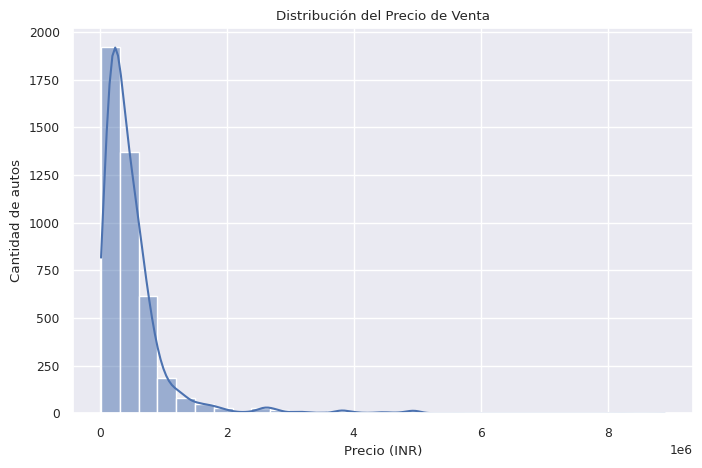

In [98]:
# Histograma de precios
plt.figure(figsize=(8,5))
sns.histplot(df['selling_price'], bins=30, kde=True)
plt.title('Distribuci√≥n del Precio de Venta')
plt.xlabel('Precio (INR)')
plt.ylabel('Cantidad de autos')
plt.show()

* El gr√°fico muestra una distribuci√≥n altamente sesgada hacia la derecha, t√≠pica de precios o ingresos.

* Esto implica que la gran mayor√≠a de los autos tienen precios bajos (concentrados en el extremo izquierdo del gr√°fico), y solo unos pocos tienen precios muy altos, que estiran el eje x.



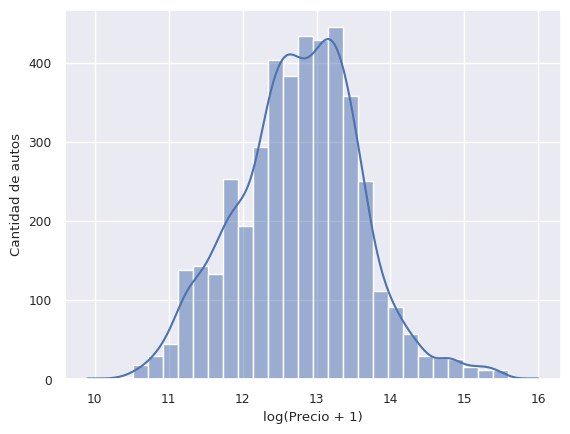

In [99]:
# La variable selling_price tiene valores que van desde 20,000 a 8,900,000, es decir, una escala muy amplia y sesgada.
# Se aplica log1p reduce la asimetr√≠a y permite ver mejor los patrones ocultos, como si fuera "acercar la lupa" al grupo m√°s denso de datos.
# Esta transformaci√≥n comprime valores grandes y expande valores peque√±os, lo cual ayuda a visualizar mejor distribuciones muy sesgadas

sns.histplot(np.log1p(df['selling_price']), bins=30, kde=True)
plt.xlabel("log(Precio + 1)")
plt.ylabel("Cantidad de autos")
plt.show()

Distribuci√≥n sim√©trica y unimodal
* La forma general del histograma es aproximadamente sim√©trica y presenta una √∫nica moda (pico).

* Esto indica que hay un rango de precios dominante donde se concentran la mayor√≠a de los autos.

Rango central m√°s denso: entre log(12) y log(14)
* La mayor densidad de autos se encuentra en el rango de valores logar√≠tmicos entre 12 y 14.

In [100]:
# Si revertimos la transformaci√≥n con np.expm1():
print(np.expm1(12).round())
print(np.expm1(14).round())

162754.0
1202603.0


Esto significa que la mayor√≠a de los autos tienen un precio entre ~160,000 y ~1.2 millones INR.

Valores extremos (colas)
* Hay autos con precios mucho menores y mucho mayores, pero en baja cantidad (colas del gr√°fico, entre log(10) y log(11), y de log(15) en adelante).

* Esto indica que hay outliers: algunos autos muy baratos o muy caros, pero no representan a la mayor√≠a.

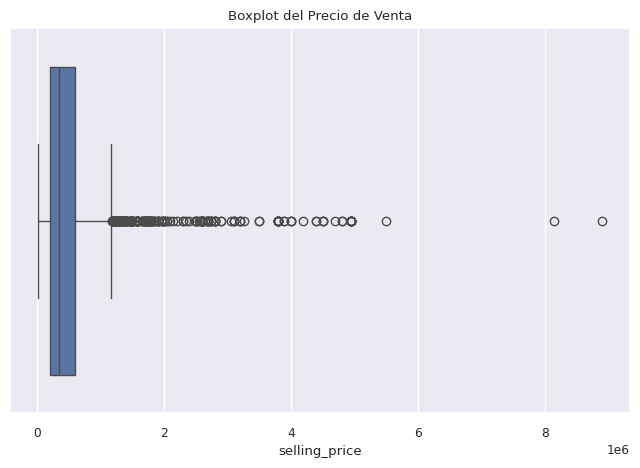

In [101]:
# Boxplot para detectar outliers
plt.figure(figsize=(8,5))
sns.boxplot(x=df['selling_price'])
plt.title('Boxplot del Precio de Venta')
plt.show()

Distribuci√≥n asim√©trica a la derecha (sesgo positivo):
* La mayor√≠a de los datos est√°n agrupados hacia la izquierda (precios bajos).
* Hay una cola larga de valores altos hacia la derecha, lo cual indica presencia de precios de venta muy altos en comparaci√≥n con la mayor√≠a.

Presencia de muchos outliers (valores at√≠picos):
* Los puntos individuales a la derecha del bigote superior son valores que el boxplot considera como at√≠picos.
* Esto sugiere que hay muchas ventas con precios considerablemente m√°s altos que el rango intercuart√≠lico (IQR).

Mediana desplazada a la izquierda:
* La l√≠nea dentro de la caja representa la mediana del selling_price. Est√° m√°s cerca del l√≠mite inferior de la caja, lo que refuerza la asimetr√≠a hacia la derecha.

Caja peque√±a en proporci√≥n al rango total¬®:
* Esto indica que el 50% central de los datos (entre el Q1 y Q3) tiene una variaci√≥n mucho menor que el resto de los datos (los outliers se extienden bastante).


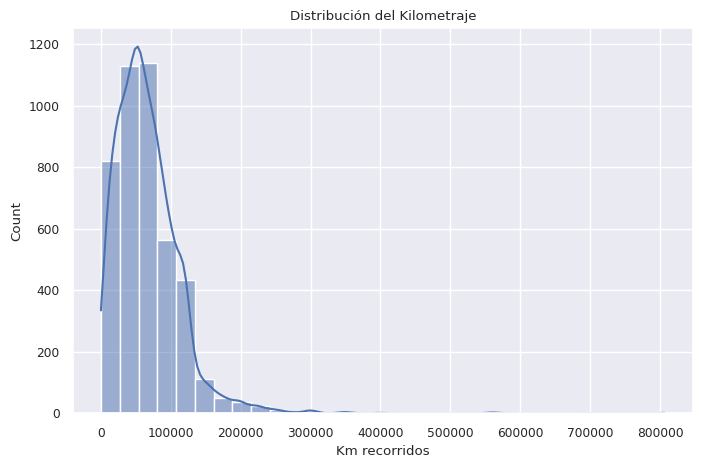

In [102]:
# Histograma del kilometraje
plt.figure(figsize=(8,5))
sns.histplot(df['km_driven'], bins=30, kde=True)
plt.title('Distribuci√≥n del Kilometraje')
plt.xlabel('Km recorridos')
plt.show()

### üîó 6. Relaci√≥n entre variables

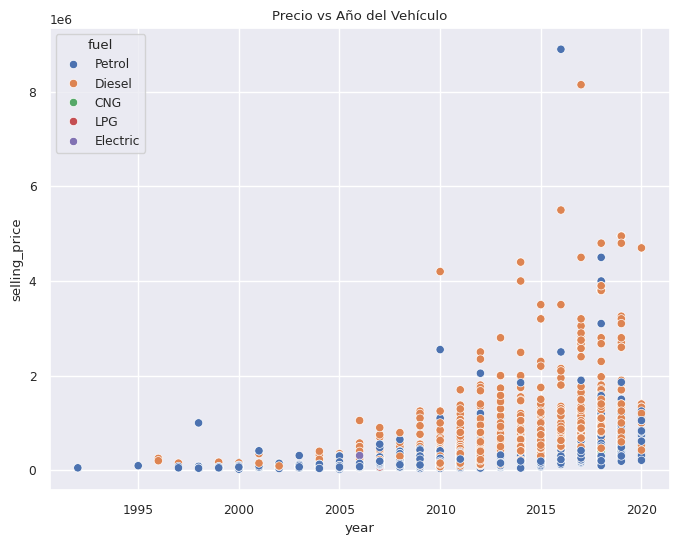

selling_price      year  km_driven
selling_price       1.000000  0.413922  -0.192289
year                0.413922  1.000000  -0.419688
km_driven          -0.192289 -0.419688   1.000000

In [103]:
# Precio vs A√±o
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='year', y='selling_price', hue='fuel')
plt.title('Precio vs A√±o del Veh√≠culo')
plt.show()

# Correlaci√≥n num√©rica
df[['selling_price', 'year', 'km_driven']].corr()


## ‚úÖ Actividades Pr√°cticas

1. ¬øCu√°l es el promedio de autos listados por a√±o? Grafic√° la cantidad de autos por a√±o.
2. Calcul√° la media, mediana y moda del `year` (a√±o del veh√≠culo).
3. Realiz√° un boxplot del kilometraje recorrido (`km_driven`) para detectar outliers.
4. Calcul√° el rango, varianza y desviaci√≥n est√°ndar del `year`.
5. Hac√© un histograma del `selling_price` para autos que usan combustible "Diesel".
6. Grafic√° la distribuci√≥n de autos por tipo de transmisi√≥n (`manual` vs `automatic`).
7. ¬øCu√°l es la relaci√≥n entre el tipo de combustible (`fuel`) y el precio promedio de venta?
8. Usando un `groupby`, obten√© el precio medio por a√±o de fabricaci√≥n.
9. Mostr√° en un gr√°fico de barras cu√°ntos autos pertenecen a cada n√∫mero de due√±os (`owner`).
10. Calcul√° las medidas de dispersi√≥n para el precio de autos autom√°ticos √∫nicamente.

1. ¬øCu√°l es el promedio de autos listados por a√±o? Grafic√° la cantidad de autos por a√±o.

El promedio de autos listados por a√±o es: 160.74


/tmp/ipython-input-104-3179926138.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='year', palette='viridis')


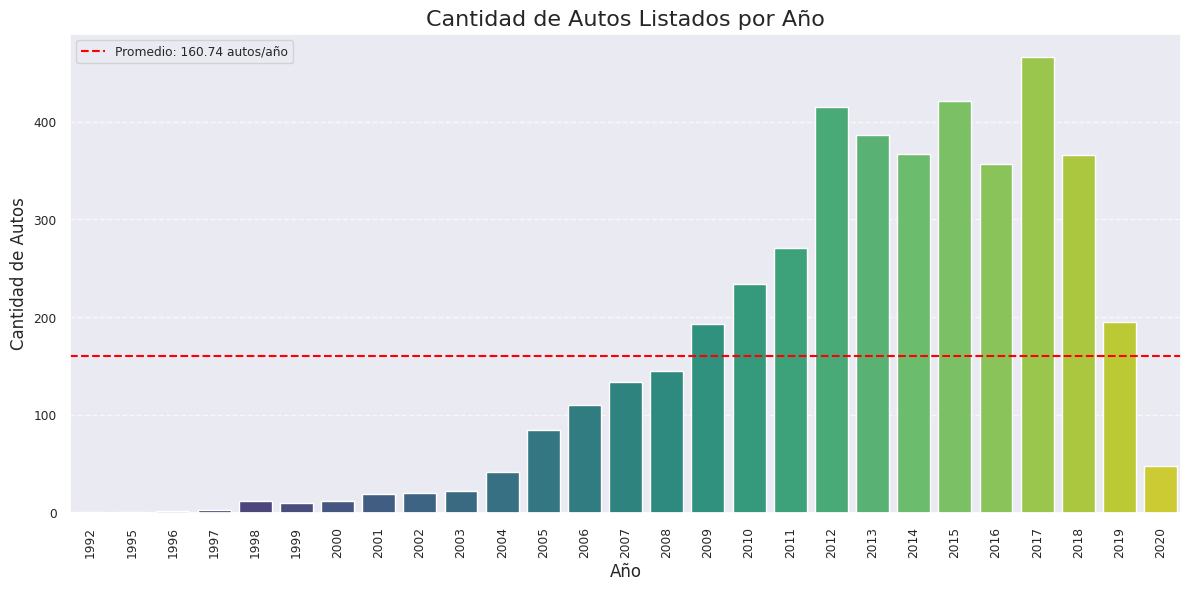

In [104]:
# 1. Calcular el promedio de autos por a√±o
autos_por_a√±o = df['year'].dropna().value_counts().sort_index()
promedio_autos = autos_por_a√±o.mean()

print(f"El promedio de autos listados por a√±o es: {promedio_autos:.2f}")

# 2. Graficar la cantidad de autos por a√±o
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='year', palette='viridis')
plt.title('Cantidad de Autos Listados por A√±o', fontsize=16)
plt.xlabel('A√±o', fontsize=12)
plt.ylabel('Cantidad de Autos', fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el promedio como l√≠nea horizontal
plt.axhline(y=promedio_autos, color='red', linestyle='--',
            label=f'Promedio: {promedio_autos:.2f} autos/a√±o')
plt.legend()

plt.tight_layout()
plt.show()

2. Calcul√° la media, mediana y moda del `year` (a√±o del veh√≠culo).

In [105]:
# Calcular media, mediana y moda del a√±o
mean_year = np.mean(df['year'])
median_year = np.median(df['year'])
mode_year = df['year'].mode().values[0]  # La moda puede tener m√∫ltiples valores, tomamos el primero

# Mostrar los resultados
print(f"Media del a√±o: {mean_year:.2f}")
print(f"Mediana del a√±o: {median_year}")
print(f"Moda del a√±o: {mode_year}")

Media del a√±o: 2013.09
Mediana del a√±o: 2014.0
Moda del a√±o: 2017


3. Realiz√° un boxplot del kilometraje recorrido (`km_driven`) para detectar outliers.

Estad√≠sticas descriptivas de km_driven:
count      4340.000000
mean      66215.777419
std       46644.102194
min           1.000000
25%       35000.000000
50%       60000.000000
75%       90000.000000
max      806599.000000
Name: km_driven, dtype: float64


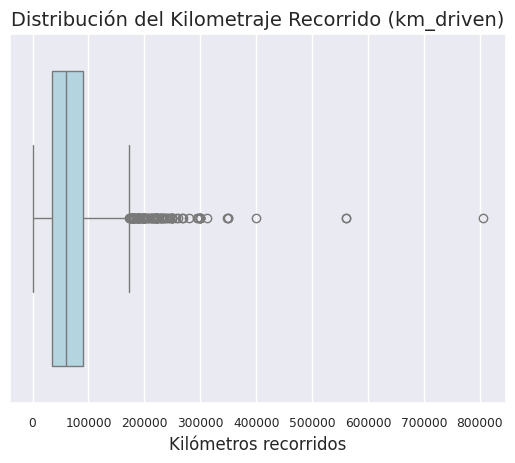

In [106]:
# Crear el boxplot
ax = sns.boxplot(x=df['km_driven'], color='lightblue')

# A√±adir t√≠tulo y etiquetas
plt.title('Distribuci√≥n del Kilometraje Recorrido (km_driven)', fontsize=14)
plt.xlabel('Kil√≥metros recorridos', fontsize=12)

# Mostrar valores estad√≠sticos clave
stats = df['km_driven'].describe()
print("Estad√≠sticas descriptivas de km_driven:")
print(stats)

# Mostrar el gr√°fico
plt.show()

Distribuci√≥n asim√©trica a la derecha (positivamente sesgada):
* La mayor parte de los datos est√° concentrada entre 0 y aproximadamente 150,000 km.
* Sin embargo, hay valores muy altos (m√°s de 200,000 km e incluso cercanos a 800,000 km) que generan una cola larga a la derecha.

Outliers (valores at√≠picos):
* Muchos puntos individuales fuera de los "bigotes" del boxplot indican valores at√≠picos.
* Estos representan autos con kilometrajes mucho mayores al promedio y a los valores t√≠picos del dataset.
* Estos outliers pueden afectar an√°lisis estad√≠sticos como la media, por lo que podr√≠a ser √∫til tratarlos (por ejemplo, usando la mediana o transformaciones logar√≠tmicas).

Mediana desplazada hacia la izquierda:
* La l√≠nea que representa la mediana est√° m√°s cerca del primer cuartil que del tercero, lo que refuerza la idea de que la distribuci√≥n est√° sesgada positivamente

Text(0.5, 0, 'Kil√≥metros recorridos')

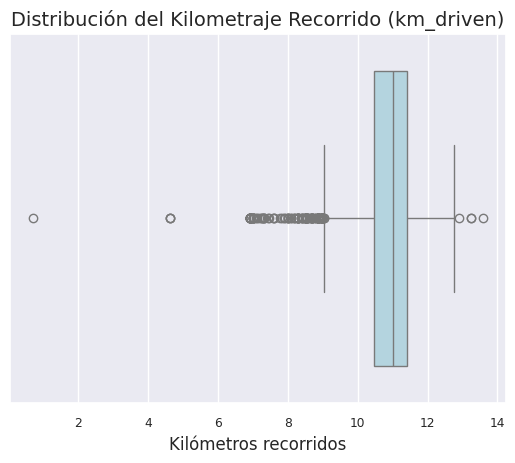

In [107]:
# Transformaci√≥n logar√≠tmica
ax = sns.boxplot(x=np.log1p(df['km_driven']), color='lightblue')

# A√±adir t√≠tulo y etiquetas
plt.title('Distribuci√≥n del Kilometraje Recorrido (km_driven)', fontsize=14)
plt.xlabel('Kil√≥metros recorridos', fontsize=12)

In [108]:
print(np.expm1(6).round())
print(np.expm1(10).round())

402.0
22025.0


Distribuci√≥n sesgada a la derecha (positivamente)
* Aunque se us√≥ el logaritmo, todav√≠a se ven muchos valores concentrados en el extremo inferior (izquierda) y una ‚Äúcola‚Äù que se extiende hacia la derecha.

* Esto indica que la mayor√≠a de los autos tiene un kilometraje bajo o medio, y hay algunos pocos con kilometraje muy alto (outliers).

Outliers:
* Se ven puntos individuales fuera del bigote derecho e izquierdo del boxplot: estos son autos con kilometraje inusualmente bajo o alto.

* El logaritmo suaviza un poco los outliers extremos, pero siguen presentes.

* La mayor√≠a de los autos del dataset tienen un kilometraje medio-bajo.
* Hay una alta concentraci√≥n de datos entre log(6) y log(10), que se traduce en valores reales entre aproximadamente 400 km y 22,000 km.
* Existen varios outliers, especialmente en los valores altos de kilometraje

4. Calcul√° el rango, varianza y desviaci√≥n est√°ndar del `year`.

In [109]:
# Calcular el rango
year_range = df['year'].max() - df['year'].min()

# Calcular la varianza
year_variance = np.var(df['year'])

# Calcular la desviaci√≥n est√°ndar
year_std_dev = np.std(df['year'])

print(f"Rango del a√±o: {year_range}")
print(f"Varianza del a√±o: {year_variance:.2f}")
print(f"Desviaci√≥n est√°ndar del a√±o: {year_std_dev:.2f}")

Rango del a√±o: 28
Varianza del a√±o: 17.77
Desviaci√≥n est√°ndar del a√±o: 4.21


5. Hac√© un histograma del `selling_price` para autos que usan combustible "Diesel".

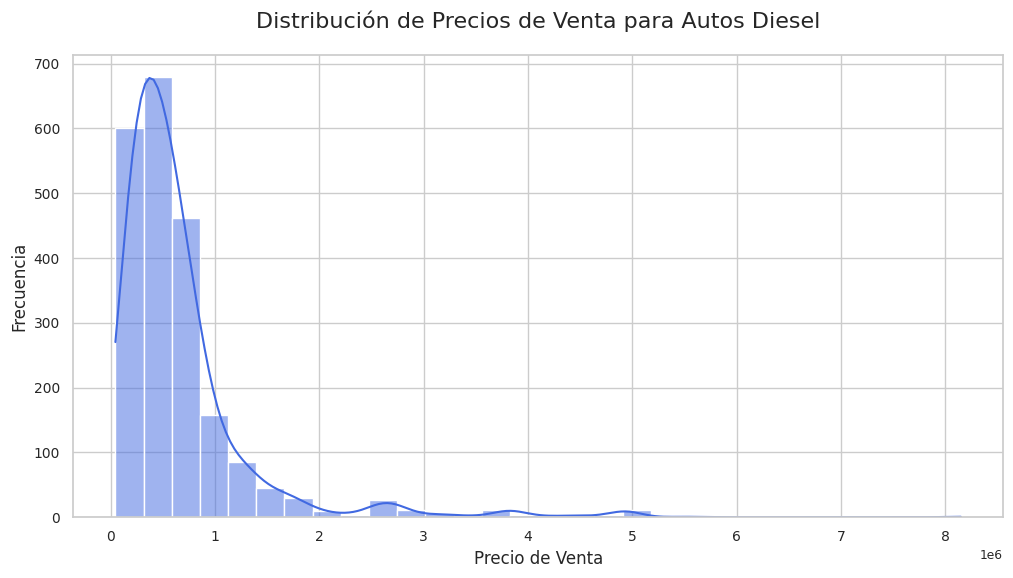

In [110]:
# Filtrar solo los autos diesel
diesel_cars = df[df['fuel'] == 'Diesel']

# Configurar el estilo de seaborn
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))

# Crear el histograma
hist = sns.histplot(data=diesel_cars, x='selling_price', bins=30, kde=True, color='royalblue')

# Configuraciones adicionales del gr√°fico
plt.title('Distribuci√≥n de Precios de Venta para Autos Diesel', fontsize=16, pad=20)
plt.xlabel('Precio de Venta', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Mostrar el gr√°fico
plt.show()

/tmp/ipython-input-111-362914082.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diesel_cars['log_price'] = np.log1p(diesel_cars['selling_price'])


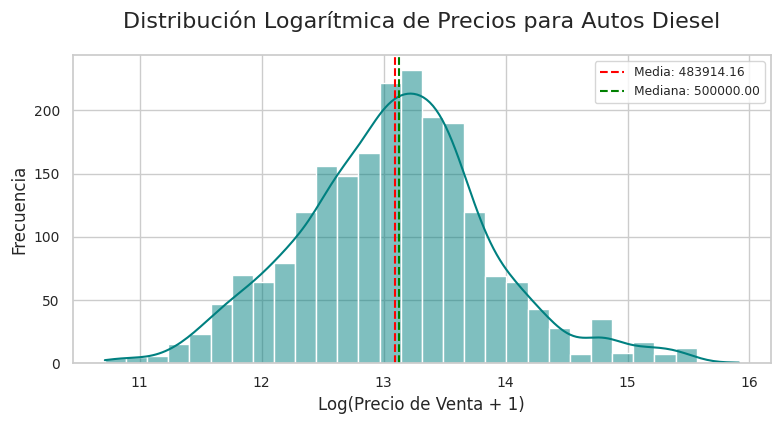

In [111]:
# Aplicar transformaci√≥n logar√≠tmica (log1p para manejar ceros)
diesel_cars['log_price'] = np.log1p(diesel_cars['selling_price'])

# Configuraci√≥n del gr√°fico
plt.figure(figsize=(9, 4))
sns.set_style('whitegrid')

# Crear histograma con KDE
ax = sns.histplot(data=diesel_cars, x='log_price', bins=30,
                 kde=True, color='teal')

# Calcular estad√≠sticas descriptivas
mean_log = diesel_cars['log_price'].mean()
median_log = diesel_cars['log_price'].median()

# A√±adir l√≠neas de referencia
ax.axvline(mean_log, color='red', linestyle='--', linewidth=1.5,
           label=f'Media: {np.expm1(mean_log):.2f}')
ax.axvline(median_log, color='green', linestyle='--', linewidth=1.5,
           label=f'Mediana: {np.expm1(median_log):.2f}')

# Configurar etiquetas y t√≠tulo
plt.title('Distribuci√≥n Logar√≠tmica de Precios para Autos Diesel', fontsize=16, pad=20)
plt.xlabel('Log(Precio de Venta + 1)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend()

# Mostrar el gr√°fico
plt.show()

In [112]:
# Si revertimos la transformaci√≥n con np.expm1():

# Valores en los que se encuentran los precios
print(np.expm1(11).round())
print(np.expm1(16).round())

# Mayor concentracion de vehiculos
print(np.expm1(13).round())
print(np.expm1(14).round())


59873.0
8886110.0
442412.0
1202603.0


Transformaci√≥n logar√≠tmica
* El gr√°fico muestra una distribuci√≥n m√°s sim√©trica gracias a la transformaci√≥n logar√≠tmica (log1p), lo que sugiere que los precios originales ten√≠an una distribuci√≥n fuertemente sesgada a la derecha.

Rango de precios
* Los valores en el eje X (11-16) representan log(precio+1), lo que corresponde aproximadamente a precios entre 59,873 (e^11) y 8,886,110 (e^16) en escala original.

Medidas de tendencia central:
* La media (483,914) es ligeramente menor que la mediana (500,000), lo que indica una ligera asimetr√≠a izquierda en la distribuci√≥n transformada.
* Esta proximidad entre media y mediana confirma que la transformaci√≥n logar√≠tmica ha normalizado efectivamente los datos.

Distribuci√≥n de frecuencias
* La mayor concentraci√≥n de veh√≠culos parece estar alrededor de los 13-14 en escala logar√≠tmica (aproximadamente 442,000 - 1,202,000).
* La frecuencia disminuye gradualmente hacia ambos extremos, mostrando una distribuci√≥n aproximadamente normal en escala logar√≠tmica.

6. Grafic√° la distribuci√≥n de autos por tipo de transmisi√≥n (manual vs automatic).

In [113]:
# Verificar los valores √∫nicos en la columna 'transmission'
print(df['transmission'].unique())

['Manual' 'Automatic']


/tmp/ipython-input-114-3046547380.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=transmission_counts.index, y=transmission_counts.values, palette="viridis")


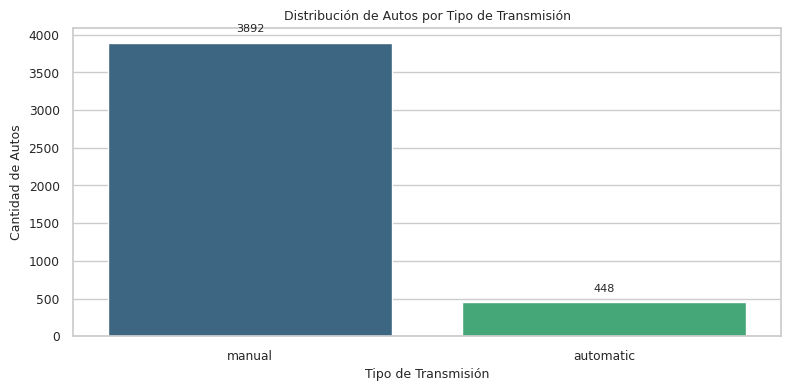

In [114]:
# Limpiar y estandarizar los datos de transmisi√≥n
df['transmission'] = df['transmission'].str.lower().str.strip()

# Contar la cantidad de autos por tipo de transmisi√≥n
transmission_counts = df['transmission'].value_counts()

# Crear el gr√°fico
plt.figure(figsize=(8, 4))
sns.set_style("whitegrid")

# Gr√°fico de barras
ax = sns.barplot(x=transmission_counts.index, y=transmission_counts.values, palette="viridis")

# A√±adir t√≠tulo y etiquetas
plt.title('Distribuci√≥n de Autos por Tipo de Transmisi√≥n', fontsize=9)
plt.xlabel('Tipo de Transmisi√≥n', fontsize=9)
plt.ylabel('Cantidad de Autos', fontsize=9)

# A√±adir los valores en las barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points',
                fontsize=8)

# Mostrar el gr√°fico
plt.tight_layout()
plt.show()

7. ¬øCu√°l es la relaci√≥n entre el tipo de combustible (`fuel`) y el precio promedio de venta?

/tmp/ipython-input-115-1762996935.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='fuel', y='selling_price', data=fuel_price, palette="viridis", order=fuel_price['fuel'])


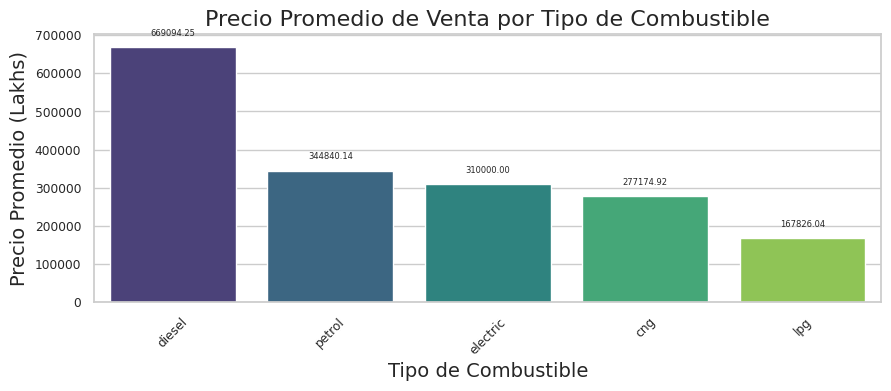

In [115]:
# Limpieza de datos
df['fuel'] = df['fuel'].str.lower().str.strip()

# Calcular precios promedio por tipo de combustible
fuel_price = df.groupby('fuel')['selling_price'].mean().sort_values(ascending=False)

#Se restablece el √≠ndice del dataframe, para evitar error en el grafico
fuel_price = fuel_price.reset_index()

# Crear visualizaci√≥n
plt.figure(figsize=(9, 4))
sns.set_style("whitegrid")

# Gr√°fico de barras
ax = sns.barplot(x='fuel', y='selling_price', data=fuel_price, palette="viridis", order=fuel_price['fuel'])

# A√±adir detalles al gr√°fico
plt.title('Precio Promedio de Venta por Tipo de Combustible', fontsize=16)
plt.xlabel('Tipo de Combustible', fontsize=14)
plt.ylabel('Precio Promedio (Lakhs)', fontsize=14)
plt.xticks(rotation=45)

# A√±adir valores en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', #Obtiene la altura de la barra
                (p.get_x() + p.get_width() / 2., p.get_height()), #Posicion del texto
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points',
                fontsize=6)

plt.tight_layout()
plt.show()

* Los autos diesel tienen el precio promedio m√°s alto, siendo aproximadamente 74% m√°s caros que los de gasolina.
* Los veh√≠culos a gasolina (petrol) ocupan el segundo lugar
* Los combustibles alternativos (CNG y LPG) muestran los precios promedio m√°s bajos, lo que podr√≠a indicar que son opciones m√°s econ√≥micas o que se aplican principalmente a modelos m√°s accesibles.

8. Usando un `groupby`, obten√© el precio medio por a√±o de fabricaci√≥n.

In [116]:
# Calcular el precio medio por a√±o
price_by_year = df.groupby('year')['selling_price'].mean().reset_index()

# Ordenar por a√±o
price_by_year = price_by_year.sort_values('year')

print(price_by_year)

    year  selling_price
0   1992   5.000000e+04
1   1995   9.500000e+04
2   1996   2.250000e+05
3   1997   9.300000e+04
4   1998   2.140000e+05
5   1999   7.350000e+04
6   2000   8.150000e+04
7   2001   1.176499e+05
8   2002   9.071429e+04
9   2003   8.656522e+04
10  2004   1.217500e+05
11  2005   1.090130e+05
12  2006   1.577999e+05
13  2007   1.628284e+05
14  2008   1.742013e+05
15  2009   2.295647e+05
16  2010   2.696781e+05
17  2011   2.936383e+05
18  2012   3.716289e+05
19  2013   4.848010e+05
20  2014   5.232316e+05
21  2015   5.289430e+05
22  2016   6.083641e+05
23  2017   7.689098e+05
24  2018   9.107705e+05
25  2019   1.059020e+06
26  2020   8.184791e+05


(array([1990., 1995., 2000., 2005., 2010., 2015., 2020., 2025.]),
 [Text(1990.0, 0, '1990'),
  Text(1995.0, 0, '1995'),
  Text(2000.0, 0, '2000'),
  Text(2005.0, 0, '2005'),
  Text(2010.0, 0, '2010'),
  Text(2015.0, 0, '2015'),
  Text(2020.0, 0, '2020'),
  Text(2025.0, 0, '2025')])

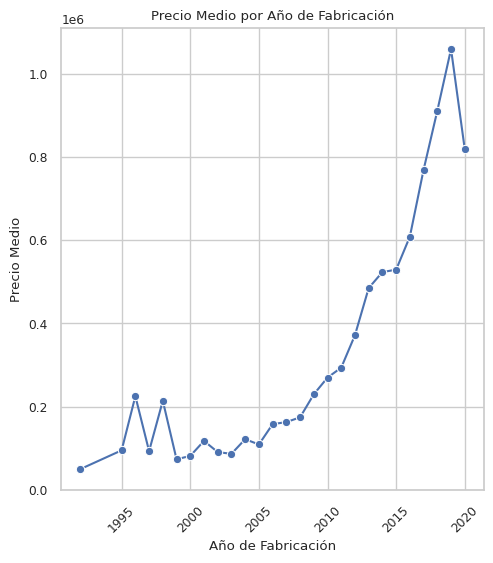

In [117]:
# Visualizaci√≥n
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Gr√°fico de l√≠nea
plt.subplot(1, 2, 1)
sns.lineplot(x='year', y='selling_price', data=price_by_year, marker='o', color='b')
plt.title('Precio Medio por A√±o de Fabricaci√≥n')
plt.xlabel('A√±o de Fabricaci√≥n')
plt.ylabel('Precio Medio')
plt.xticks(rotation=45)

* Los autos m√°s nuevos (2018-2020) tienen precios medios m√°s altos

* Los autos m√°s viejos (1995-2005) tienen precios medios m√°s bajos

* Hay una clara correlaci√≥n positiva entre el a√±o de fabricaci√≥n y el precio de venta

9. Mostr√° en un gr√°fico de barras cu√°ntos autos pertenecen a cada n√∫mero de due√±os (`owner`).

/tmp/ipython-input-118-3198311172.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=owner_counts.index, y=owner_counts.values, palette='viridis')


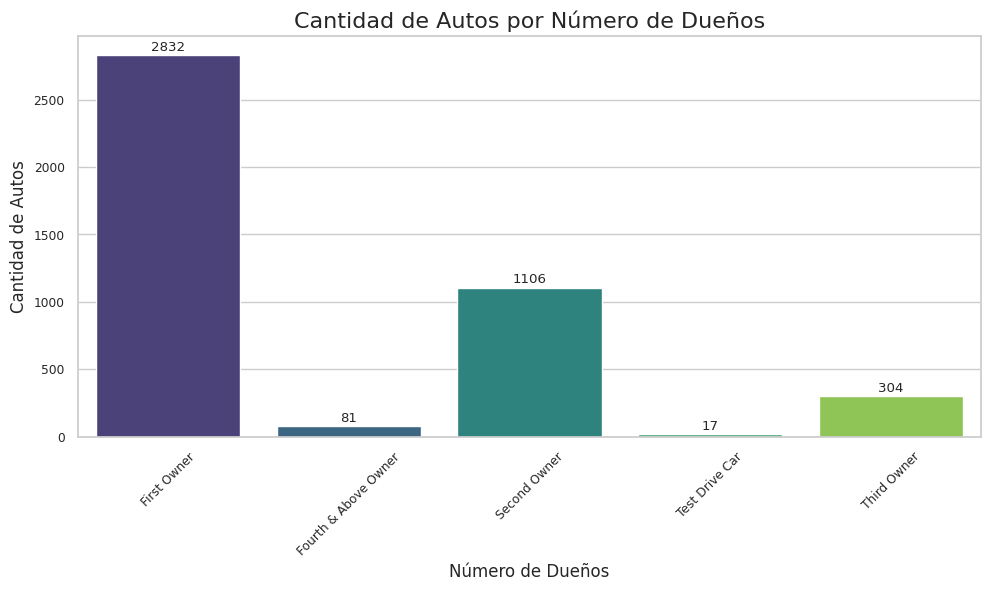

In [118]:
# Limpiar y estandarizar los valores de 'owner'
df['owner'] = df['owner'].str.strip()  # Eliminar espacios en blanco

# Contar la cantidad de autos por cada categor√≠a de due√±o
owner_counts = df['owner'].value_counts().sort_index()

# Crear el gr√°fico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=owner_counts.index, y=owner_counts.values, palette='viridis')

# A√±adir t√≠tulo y etiquetas
plt.title('Cantidad de Autos por N√∫mero de Due√±os', fontsize=16)
plt.xlabel('N√∫mero de Due√±os', fontsize=12)
plt.ylabel('Cantidad de Autos', fontsize=12)
plt.xticks(rotation=45)

# A√±adir los valores en las barras
# enumerate() itera sobre los valores (v) y sus √≠ndices (i) de owner_counts.values.
for i, v in enumerate(owner_counts.values):
    plt.text(i, v + 10, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

10. Calcul√° las medidas de dispersi√≥n para el precio de autos autom√°ticos √∫nicamente.

In [119]:
# Verificar
df['transmission'] = df['transmission'].str.strip().str.lower()

# Filtrar solo autos autom√°ticos
automatic_cars = df[df['transmission'] == 'automatic']

# Calcular medidas de dispersi√≥n
price_stats = {
    'Rango': automatic_cars['selling_price'].max() - automatic_cars['selling_price'].min(),
    'Varianza': automatic_cars['selling_price'].var(),
    'Desviaci√≥n Est√°ndar': automatic_cars['selling_price'].std(),
    'Coeficiente de Variaci√≥n': (automatic_cars['selling_price'].std() / automatic_cars['selling_price'].mean()) * 100,
    'Rango Intercuart√≠lico (IQR)': automatic_cars['selling_price'].quantile(0.75) - automatic_cars['selling_price'].quantile(0.25)
}

# Mostrar las medidas de dispersi√≥n
print("Medidas de dispersi√≥n para precios de autos autom√°ticos:")
for stat, value in price_stats.items():
    print(f"{stat}: {value:,.2f}")


Medidas de dispersi√≥n para precios de autos autom√°ticos:
Rango: 8,821,000.00
Varianza: 1,650,915,276,494.94
Desviaci√≥n Est√°ndar: 1,284,879.48
Coeficiente de Variaci√≥n: 91.25
Rango Intercuart√≠lico (IQR): 1,280,000.00
